# Data and Model Anlysis

In [7]:
import pandas as pd
import numpy as np

In [8]:
#three Classes
#Dataset=pd.read_csv(r'/Users/macbook/Desktop/AneeshTeams/FinalSet.csv')
#Dataset['Class'].replace(['away Win', 'Draw','home Win'], [-1, 0, 1], inplace=True)

#Two Classes
Dataset=pd.read_csv(r'/Users/macbook/Desktop/AneeshTeams/dropDraw.csv')
Dataset['Class'].replace(['away Win','home Win'], [0, 1], inplace=True)
Dataset.head()


,home_team,away_team,d_Age,d_rank,d_OVA,d_ATT,d_MID,d_DEF,d_avg_goal,Class
0,Portugal,Spain,-1.4,-2,0.000000,-2.000000,2.000000,-2.000000,1.2,0
1,South Korea,Cameroon,-1.1,15,-2.497512,-3.715846,-0.487165,-3.595485,-0.4,1
2,Canada,Uruguay,1.1,-27,5.163690,4.003197,5.776913,5.687825,1.4,0
3,Brazil,Tunisia,0.7,-29,8.215617,4.295561,9.197514,9.183037,1.0,1
4,Netherlands,Belgium,-0.6,6,-1.000000,-1.000000,-1.000000,3.000000,0.6,1


# Correlation of Attributes

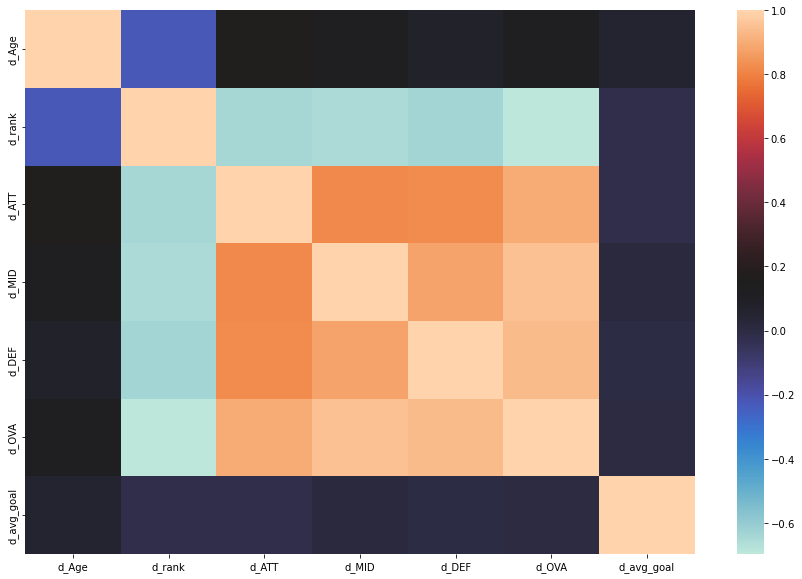

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
cmap = sns.color_palette("icefire", as_cmap=True)

sns.heatmap(Dataset[["d_Age", "d_rank", "d_ATT", "d_MID", "d_DEF", "d_OVA","d_avg_goal"]].corr() , cmap=cmap)
plt.show()

# Attribute Distribution

In [104]:
data_difs = Dataset[["d_Age", "d_rank", "d_ATT", "d_MID", "d_DEF", "d_OVA","d_avg_goal"]]
scaled = (data_difs - data_difs.mean()) / data_difs.std()
scaled["Class"] = Dataset["Class"]
violin = pd.melt(scaled,id_vars="Class", var_name="features", value_name="value")



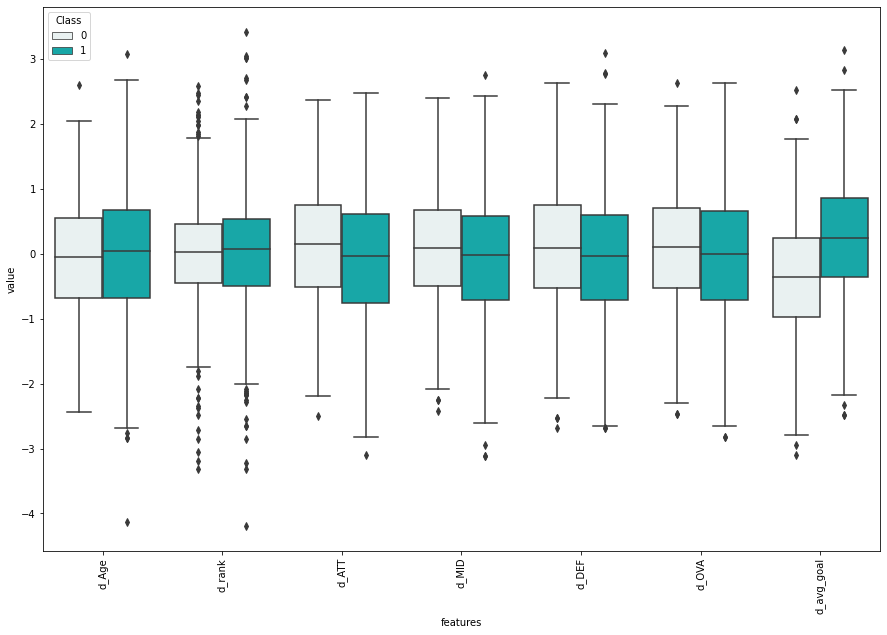

In [105]:
plt.figure(figsize=(15,10))
sns.boxplot(x="features", y="value", hue="Class", data=violin , color='c')
plt.xticks(rotation=90)
plt.show()

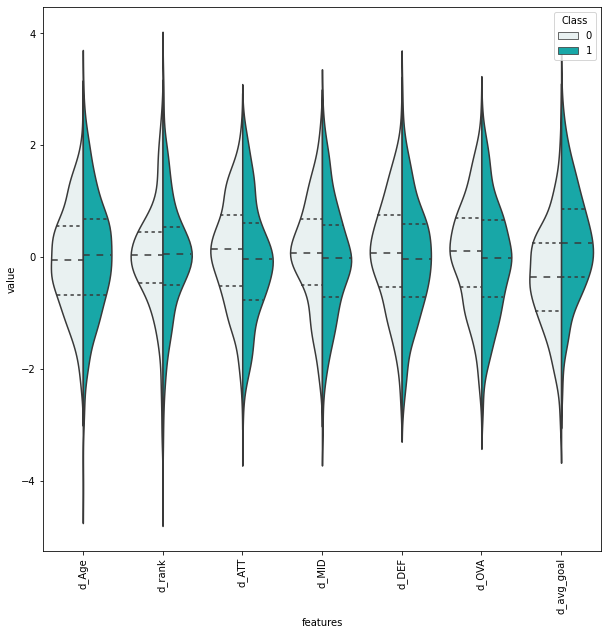

In [106]:
#Second method #not suggested

plt.figure(figsize=(10,10))
sns.violinplot(x="features", y="value", hue="Class", data=violin,split=True, inner="quart" , color='c')
plt.xticks(rotation=90)
plt.show()

# Machine Learning Models

In [72]:
x = Dataset.iloc[:, 2:-1]
y = Dataset[["Class"]]

In [73]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

In [74]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

### Gradient boosting classifiers

In [75]:
gb = GradientBoostingClassifier(random_state=5)

params = {"learning_rate": [0.01, 0.1, 0.5],
            "min_samples_split": [5, 10],
            "min_samples_leaf": [3, 5],
            "max_depth":[3,5,10],
            "max_features":["sqrt"],
            "n_estimators":[100, 200]
         } 

gb_cv = GridSearchCV(gb, params, cv = 3, n_jobs = -1, verbose = False)

gb_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=GradientBoostingClassifier(random_state=5),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 10], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [5, 10],
                         'n_estimators': [100, 200]},
             verbose=False)

In [76]:
gb = gb_cv.best_estimator_

In [77]:
gb

GradientBoostingClassifier(learning_rate=0.01, max_features='sqrt',
                           min_samples_leaf=5, min_samples_split=5,
                           n_estimators=200, random_state=5)

### Random Forest

In [107]:
params_rf = {"max_depth": [20],
                "min_samples_split": [5],
                "max_leaf_nodes": [175],
                "min_samples_leaf": [5],
                "n_estimators": [200],
                 "max_features": ["sqrt"],
                }

rf = RandomForestClassifier(random_state=1)

rf_cv = GridSearchCV(rf, params_rf, cv = 3, n_jobs = -1, verbose = False)

rf_cv.fit(X_train.values, np.ravel(y_train))

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'max_depth': [20], 'max_features': ['sqrt'],
                         'max_leaf_nodes': [175], 'min_samples_leaf': [5],
                         'min_samples_split': [5], 'n_estimators': [200]},
             verbose=False)

In [108]:
rf = rf_cv.best_estimator_

In [109]:
rf

RandomForestClassifier(max_depth=20, max_leaf_nodes=175, min_samples_leaf=5,
                       min_samples_split=5, n_estimators=200, random_state=1)

### Logistic Regression

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt

In [112]:

lr = LogisticRegression()

#fit the model using the training data
lr.fit(X_train,y_train)



/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [114]:
lr 

LogisticRegression()

### ROC & Matrix Function

In [117]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

In [118]:
def analyze(model):
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test.values)[:,1]) #test AUC
    plt.figure(figsize=(15,10))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label="test")

    fpr_train, tpr_train, _ = roc_curve(y_train, model.predict_proba(X_train.values)[:,1]) #train AUC
    plt.plot(fpr_train, tpr_train, label="train")
    auc_test = roc_auc_score(y_test, model.predict_proba(X_test.values)[:,1])
    auc_train = roc_auc_score(y_train, model.predict_proba(X_train.values)[:,1])
    plt.legend()
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.title('AUC score is %.2f on test and %.2f on training'%(auc_test, auc_train))
    plt.show()
    
    plt.figure(figsize=(15, 10))
    cm = confusion_matrix(y_test, model.predict(X_test.values))
    sns.heatmap(cm, annot=True, fmt="d"  , cmap=cmap)

### Gradient boosting classifiers ROC & Matrix

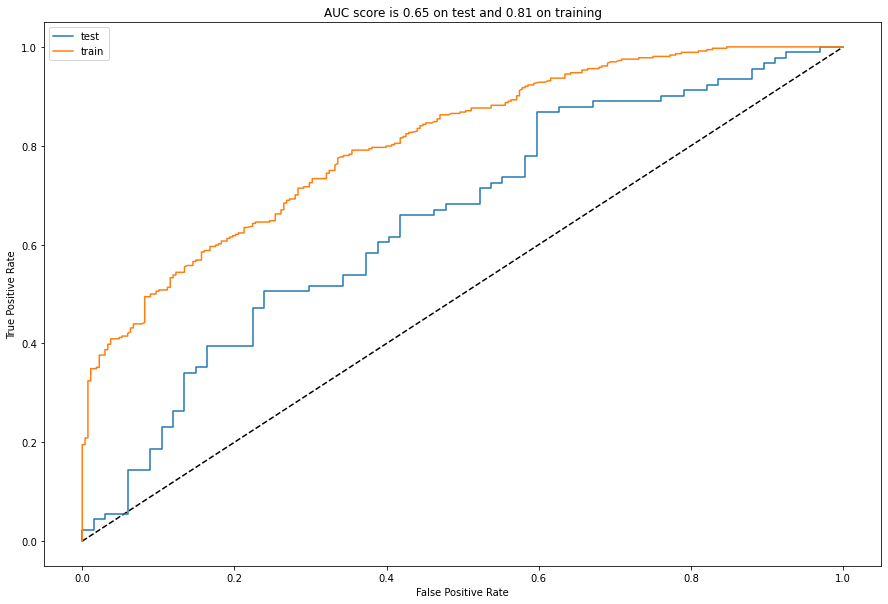

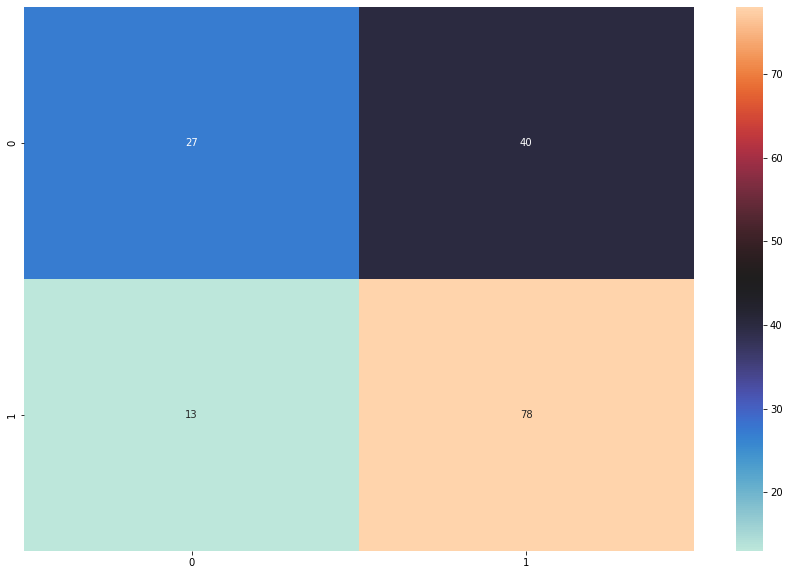

In [119]:
analyze(gb)

### Random Forest ROC & Matrix

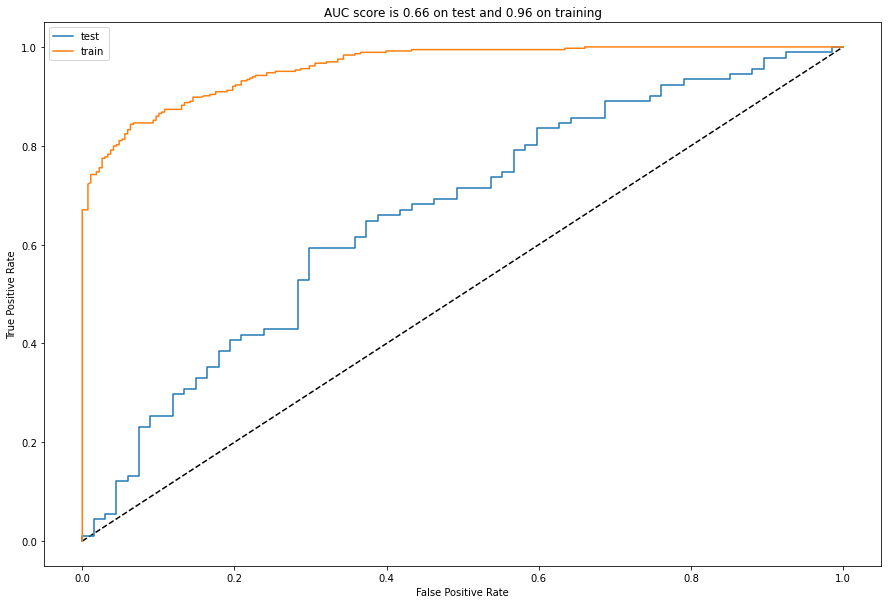

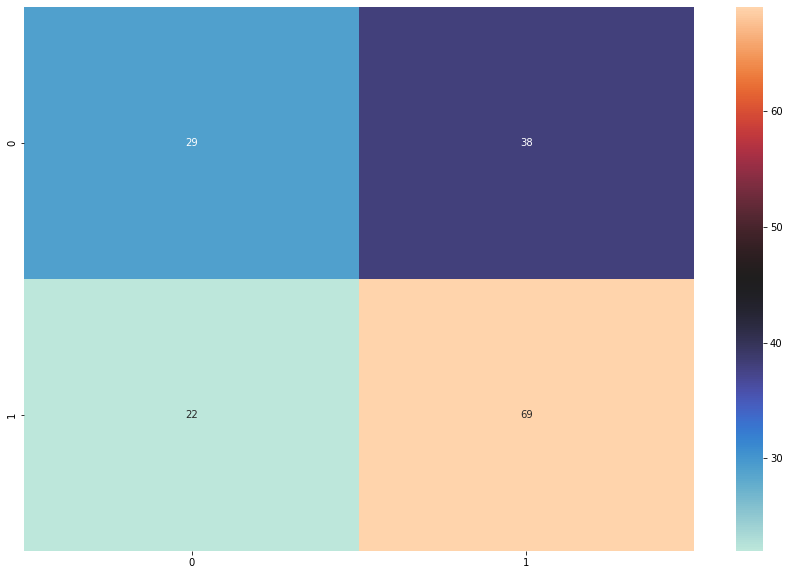

In [128]:
analyze(rf)


### Logistic Regression ROC & Matrix

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


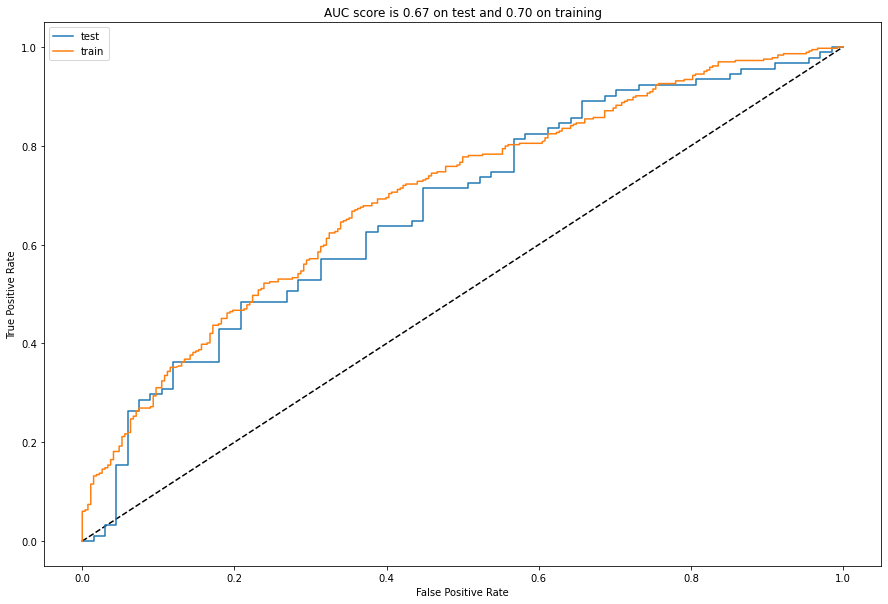

/Users/macbook/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


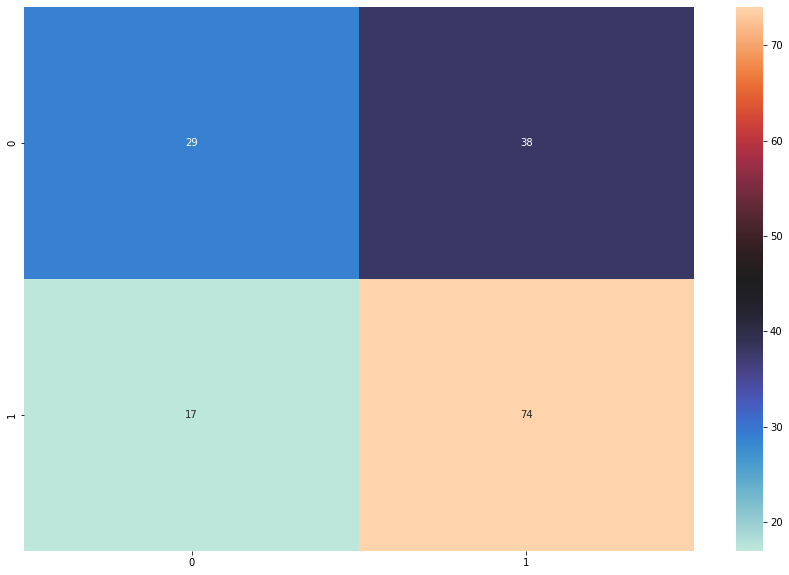

In [121]:
analyze(lr)

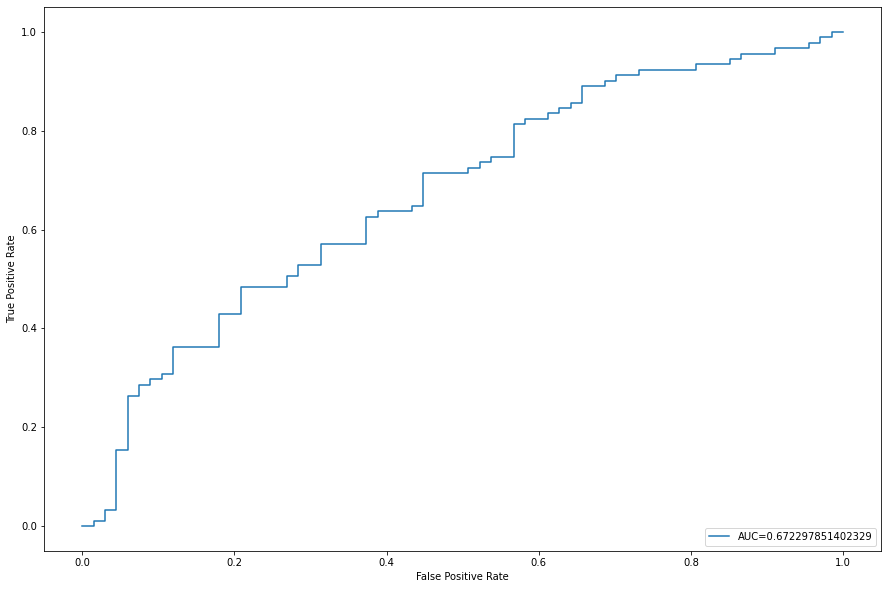

In [127]:
#define metrics
y_pred_proba = lr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.figure(figsize=(15,10))

plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()